## CSE 190: NA4AI 

### Assignment 3

### Dieter Joubert (A08497453)

In [227]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

## Part A

In [228]:
### 𝑓(𝑥,𝑦)=(𝑥^2 +𝑦−11)^2 +(𝑥+𝑦^2 −7)^2
nrpts = 101
xs = np.linspace(-5, 5, num = nrpts)
ys = np.linspace(-5, 5, num = nrpts)
xs = xs.reshape( (nrpts,1) )
ys = ys.reshape( (1, nrpts) )
h = 0.1

In [229]:
h

0.1

In [230]:
### 𝑓(𝑥,𝑦)=(𝑥^2 +𝑦−11)^2 +(𝑥+𝑦^2 −7)^2

def func(xs, ys):
    aa = (xs ** 2) + (ys) - 11
    bb = (xs) + (ys ** 2) - 7
    return aa ** 2 + bb ** 2

In [231]:
gradx = (func(xs+h,ys) - func(xs, ys) ) / h 
grady = (func(xs,ys+h) - func(xs, ys) ) / h 

#gradx = (-func(xs+2*h,ys) + 8 * func(xs+h, ys) - 8 * func(xs-h, ys) + func(xs-2*h,ys)) / (12 * h)
#grady = (-func(xs,ys+2*h) + 8 * func(xs, ys+h) - 8 * func(xs, ys-h) + func(xs,ys-2*h)) / (12 * h)

In [232]:
gradx[5,5]

-59.02899999999988

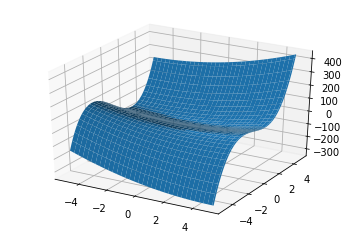

In [233]:
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
#plotting the x component of the gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xsf, ysf, gradx)
plt.show()

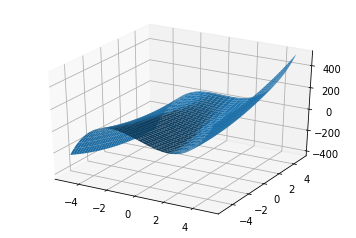

In [234]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xsf, ysf, grady)
plt.show()

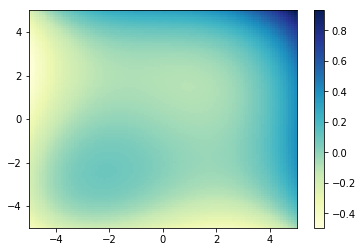

In [235]:
heatmap = gradx + grady
heatmap = heatmap / np.max(np.max(heatmap))

cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)
plt.show()

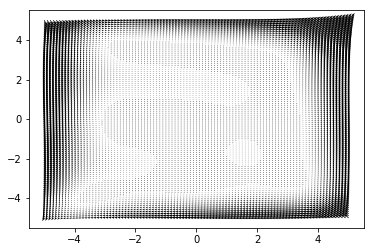

In [236]:
fig, ax = plt.subplots()
q = ax.quiver(xs, ys, gradx, grady)
plt.show()

## Part B

In [237]:
def func(x, y):
    return ((x)**2 + (y) - 11)**2 + ((x) + (y)**2 - 7)**2

h = 0.1
options = [
    (0,h), (h,0), (0,-h), (-h,0), (h,h), (-h,h), (h,-h), (-h,-h)
]

def descent(x,y):
    walk = [(x,y)]
    
    while True:
        curr = walk[-1]
        x_curr, y_curr = curr
        f_curr = func(x_curr, y_curr)
        
        f_lowest_found = float('inf')
        x_y_lowest_found = None
                
        for (x_delta, y_delta) in options:
            x_new = x_curr + x_delta
            y_new = y_curr + y_delta
            
            f_new = func(x_new,y_new)
            if f_new < f_lowest_found:
                f_lowest_found = f_new
                x_y_lowest_found = (x_new, y_new)
            
        if x_y_lowest_found and f_lowest_found < f_curr:
            walk.append(x_y_lowest_found)
        else:
            break

    return walk  

In [238]:
walk_1 = descent(-4.,4.)
walk_1[-1]


(-2.799999999999999, 3.099999999999999)

In [239]:
walk_2 = descent(-4.,-4.)
walk_2[-1]

(-3.8, -3.2999999999999994)

In [240]:
walk_3 = descent(4.,4.)
walk_3[-1]

(2.999999999999999, 1.9999999999999982)

In [241]:
walk_4 = descent(4.,-4.)
walk_4[-1]

(3.5999999999999996, -1.8999999999999981)

### Four distinct minima:

In [242]:
minima = walk_1[-1:] + walk_2[-1:] + walk_3[-1:] + walk_4[-1:]
minima

[(-2.799999999999999, 3.099999999999999),
 (-3.8, -3.2999999999999994),
 (2.999999999999999, 1.9999999999999982),
 (3.5999999999999996, -1.8999999999999981)]

In [243]:
all_points = walk_1 + walk_2 + walk_3 + walk_4

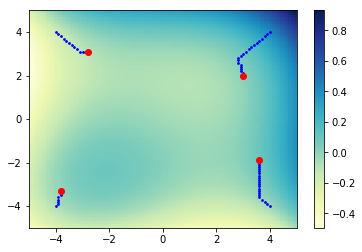

In [244]:
cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]

im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)

plt.scatter([i[0] for i in all_points], [i[1] for i in all_points], s=3, c='b')

plt.plot([i[0] for i in minima], [i[1] for i in minima], 'ro')

plt.show()